# Customer Churn Prediction

In [21]:
pip install -U scikit-learn scipy matplotlib

  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Using cached scipy-1.10.1-cp39-cp39-win_amd64.whl (42.5 MB)
  Using cached matplotlib-3.7.1-cp39-cp39-win_amd64.whl (7.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.0
    Uninstalling scipy-1.10.0:
      Successfully uninstalled scipy-1.10.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Asus\\anaconda3\\Lib\\site-packages\\~~ipy\\.libs\\libansari.54HGNEJBQIYZX5TZPCQGLNVIPFU6NWEX.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [24]:
pip install numpy --upgrade

  Using cached numpy-1.24.2-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Asus\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [108]:
np.__version__

'1.23.5'

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
le_orig = LabelEncoder()
ohe = OneHotEncoder()

# Data Transformation 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.feature_selection import SelectKBest # Select features based on the k highest scores.
from sklearn.feature_selection import SelectPercentile # Select features based on percentile of the highest scores.

from sklearn.feature_selection import chi2 # Chi-squared stats of non-negative features for classification tasks.
from sklearn.feature_selection import mutual_info_classif # Mutual information for a discrete target
from sklearn.feature_selection import f_classif # ANOVA F-value between label/feature for classification tasks.

# Import Resampling Library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import Pipeline

# Data Splitting 
from sklearn.model_selection import train_test_split

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

# sklearn Classifiers Evaluation libraries
from sklearn.metrics import classification_report # To get classification report
from sklearn.metrics import confusion_matrix # To get the confusion matrix
from sklearn.metrics import accuracy_score # To get the accuracy score 

# sklearn Regressor Evaluation libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance

# Supervised Machine Learning Models

## Random Forest Classifiers
from sklearn.ensemble import RandomForestClassifier

## Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
## Histogram-based Gradient Boosting Classification Tree
from sklearn.ensemble import HistGradientBoostingClassifier
## AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

## Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

## K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

## Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB # DV
## Naive Bayes classifier for multivariate Bernoulli models
from sklearn.naive_bayes import BernoulliNB # 2 | 3 DV
## The Complement Naive Bayes classifier
from sklearn.naive_bayes import ComplementNB # 3 DV
## Naive Bayes classifier for multinomial models
from sklearn.naive_bayes import MultinomialNB # 3 DV
## Naive Bayes classifier for categorical features
from sklearn.naive_bayes import CategoricalNB # 3 DV

## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

## Logistic Regression Classifiers
from sklearn.linear_model import LogisticRegression
## Logistic Regression CV classifier
from sklearn.linear_model import LogisticRegressionCV
## Linear classifiers with stochastic gradient descent SGD training.
from sklearn.linear_model import SGDClassifier
## Linear Perceptron Classifier
from sklearn.linear_model import Perceptron

## XGBoost Classifiers
from xgboost import XGBClassifier

## Support Vector Machines Classifiers
from sklearn.svm import SVC
## Linear Support Vector Classification
from sklearn.svm import LinearSVC

## Multilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

# Model Optmization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [71]:
data_df = pd.read_csv("C:/Users/Asus/Downloads/Telco-Customer-Churn.csv")
data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [72]:
#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    
dataoveriew(data_df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  7043

Number of features: 21

Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [73]:
target_instance = data_df["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

#### Data Preparation based on EDA

In [74]:
#Defining bar chart function
def bar(feature, df=data_df ):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str


    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)
    
    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )
     
    return fig.show()


In [75]:
#Gender feature plot
bar('gender')
#SeniorCitizen feature plot 
data_df.loc[data_df.SeniorCitizen==0,'SeniorCitizen'] = "No"   #convert 0 to No in all data instances
data_df.loc[data_df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"  #convert 1 to Yes in all data instances
bar('SeniorCitizen')
#Partner feature plot
bar('Partner')
#Dependents feature plot
bar('Dependents')

In [76]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')

In [77]:

bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

In [78]:
try:
    data_df['TotalCharges'] = data_df['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

could not convert string to float: ''


In [79]:
data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'],errors='coerce')
#Fill the missing values with with the median value
data_df['TotalCharges'] = data_df['TotalCharges'].fillna(data_df['TotalCharges'].median())

In [80]:
# Defining the histogram plotting function
def hist(feature):
    group_df = data_df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

In [81]:
hist('tenure')
hist('MonthlyCharges')
hist('TotalCharges')

In [82]:
bin_df = pd.DataFrame()

#Update the binning dataframe
bin_df['tenure_bins'] =  pd.qcut(data_df['tenure'], q=3, labels= ['low', 'medium', 'high'])
bin_df['MonthlyCharges_bins'] =  pd.qcut(data_df['MonthlyCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['TotalCharges_bins'] =  pd.qcut(data_df['TotalCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['Churn'] = data_df['Churn']

#Plot the bar chart of the binned variables
bar('tenure_bins', bin_df)
bar('MonthlyCharges_bins', bin_df)
bar('TotalCharges_bins', bin_df)

In [83]:
# The customerID column isnt useful as the feature us used for identification of customers. 
data_df.drop(["customerID"],axis=1,inplace = True)

# Encode categorical features

#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
data_df['Churn'] = data_df[['Churn']].apply(binary_map)

# Encoding gender category
data_df['gender'] = data_df['gender'].map({'Male':1, 'Female':0})

#Encoding other binary category
binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
data_df[binary_list] = data_df[binary_list].apply(binary_map)

#Encoding the other categoric features with more than two categories
data_df = pd.get_dummies(data_df, drop_first=True)

In [84]:
# Checking the correlation between features
corr = data_df.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

In [85]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name seperators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in data_df.columns]

#Effect the change to the dataframe column names
data_df.columns = all_columns

#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['customerID', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=data_df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7019
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2914.7
Date:                Sun, 12 Mar 2023   Deviance:                       5829.3
Time:                        13:34:32   Pearson chi2:                 8.04e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2807
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [86]:
np.exp(res.params)

Intercept                               2.287
gender                                  0.978
SeniorCitizen                           1.240
Partner                                 0.997
Dependents                              0.857
tenure                                  0.942
PhoneService                            1.655
PaperlessBilling                        1.408
MonthlyCharges                          0.960
TotalCharges                            1.000
MultipleLines_No_phone_service          1.382
MultipleLines_Yes                       1.563
InternetService_Fiber_optic             5.772
InternetService_No                      0.774
OnlineSecurity_No_internet_service      0.774
OnlineSecurity_Yes                      0.814
OnlineBackup_No_internet_service        0.774
OnlineBackup_Yes                        1.026
DeviceProtection_No_internet_service    0.774
DeviceProtection_Yes                    1.159
TechSupport_No_internet_service         0.774
TechSupport_Yes                   

In [87]:

#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_df['tenure'] = sc.fit_transform(data_df[['tenure']])
data_df['MonthlyCharges'] = sc.fit_transform(data_df[['MonthlyCharges']])
data_df['TotalCharges'] = sc.fit_transform(data_df[['TotalCharges']])

In [88]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split data into train and test sets
from sklearn.model_selection import train_test_split
X = data_df.drop('Churn', axis=1)
y = data_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)  

In [89]:
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

In [90]:
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.7983909133932797
precision:  0.6281800391389433
recall:  0.5763016157989228
f1_score:  0.7955174819104321


In [91]:
LogisticRegression()
# Feature selection to improve model building
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

In [92]:
rfecv.fit_transform(X, y)

array([[0.        , 0.        , 0.01388889, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.47222222, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02777778, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.15277778, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.05555556, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.91666667, ..., 0.        , 1.        ,
        0.        ]])

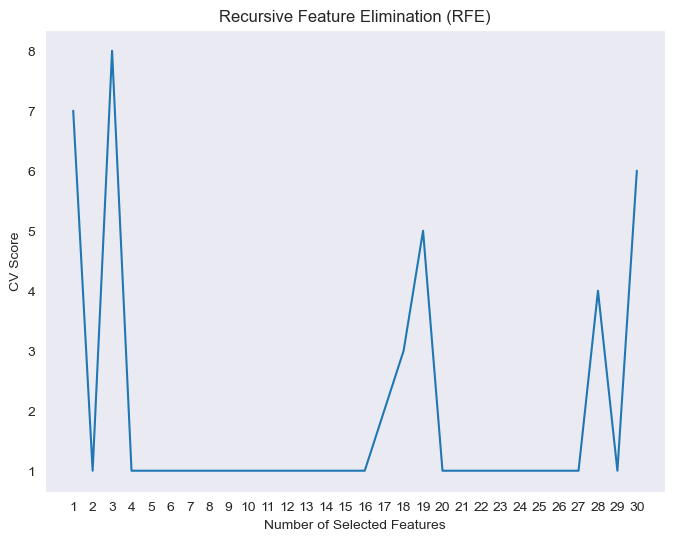

The optimal number of features: 23


In [93]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.ranking_)+1), rfecv.ranking_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [94]:
#Saving dataframe with optimal features
X_rfe = X.iloc[:, rfecv.support_]

#Overview of the optimal features in comparison with the intial dataframe
print("\"X\" dimension: {}".format(X.shape))
print("\"X\" column list:", X.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (7043, 30)
"X" column list: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_No', 'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service', 'OnlineBackup_Yes', 'DeviceProtection_No_internet_service', 'DeviceProtection_Yes', 'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes', 'StreamingMovies_No_internet_service', 'StreamingMovies_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaymentMethod_Credit_card__automatic_', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']
"X_rfe" dimension: (7043, 23)
"X_rfe" column list: ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', '

## Model Building

I am going to build and tune random forest model because in this case tree based method would perform better. I am also interested in individual customer's churning probability and in understanding how the model calculates it using Shap values.

In [95]:
def churn_prediction(model,X_test, y_test):
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:,1]
    print ("\n Classification report : \n",classification_report(y_test,predictions))
    print ("Accuracy   Score : ",accuracy_score(y_test,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(y_test,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(y_test,probabilities) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(y_test,probabilities)
    
    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

    
    plt.show()
    

In [96]:
# Splitting data with optimal features
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=50)  

### Hyperparameters Tuning

In [97]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

### Final Model

In [56]:
model = RandomForestClassifier(criterion='entropy',
                                       max_depth=1, n_estimators=100,
                                       n_jobs=-1, random_state=0).fit(X_train,y_train)



 Classification report : 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1556
           1       0.00      0.00      0.00       557

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.74      0.62      2113

Accuracy   Score :  0.7363937529578798
Area under curve :  0.811720888158654 



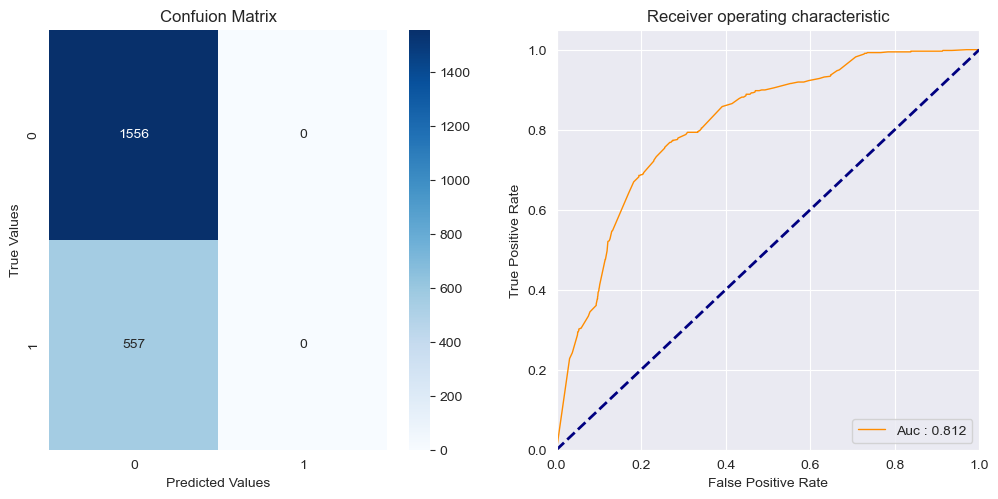

In [57]:

 churn_prediction(model, X_test, y_test)

In [58]:
model = RandomForestClassifier(class_weight='balanced',criterion='entropy',
                                       max_depth=1, n_estimators=500,
                                       n_jobs=-1, random_state=0).fit(X_train,y_train)


 Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.57      0.71      1556
           1       0.42      0.88      0.57       557

    accuracy                           0.65      2113
   macro avg       0.68      0.73      0.64      2113
weighted avg       0.80      0.65      0.67      2113

Accuracy   Score :  0.6526265972550875
Area under curve :  0.8193233582402976 



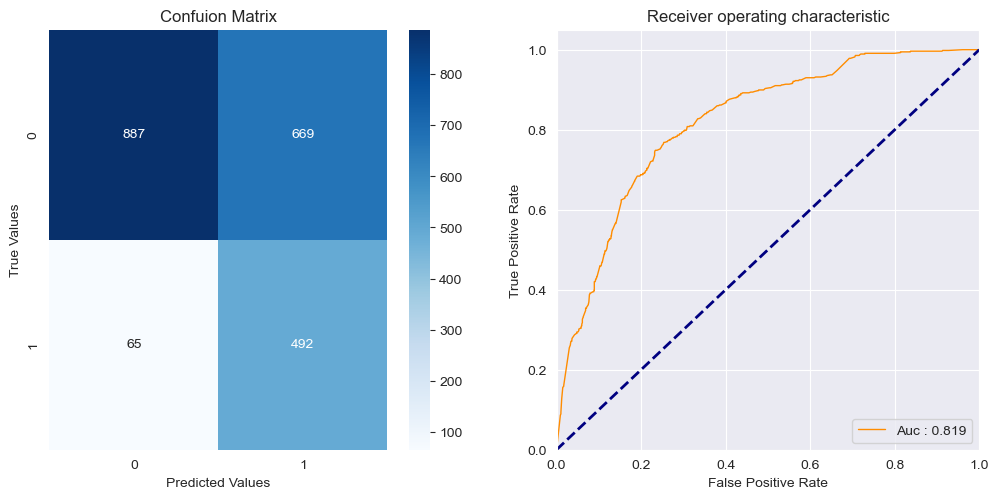

In [59]:

 churn_prediction(model, X_test, y_test)

Checking the model's performance on train data itself

In [61]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier(class_weight='balanced')
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter =10, 
                               cv = 5, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [20]},
                   random_state=101, verbose=1)

<Axes: xlabel='param_criterion', ylabel='param_n_estimators'>

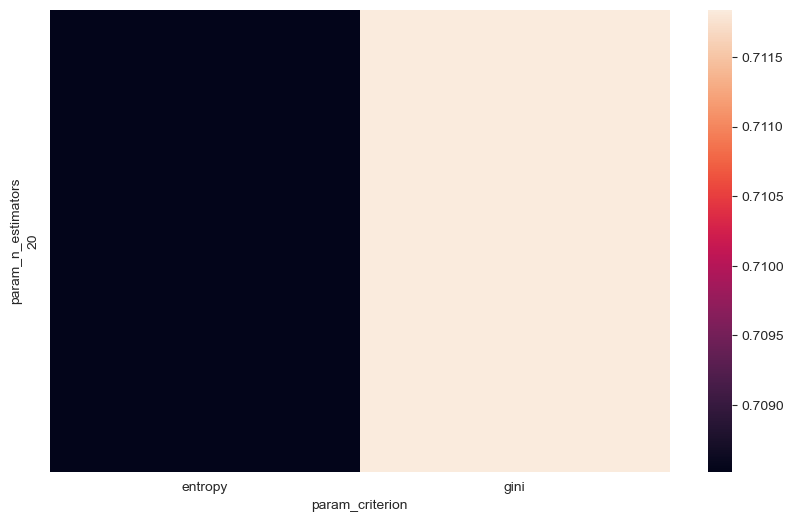

In [62]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
     
sns.heatmap(table)

In [66]:
predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)

[[949 607]
 [ 69 488]]
              precision    recall  f1-score   support

           0       0.93      0.61      0.74      1556
           1       0.45      0.88      0.59       557

    accuracy                           0.68      2113
   macro avg       0.69      0.74      0.66      2113
weighted avg       0.80      0.68      0.70      2113



In [67]:
from sklearn.model_selection import GridSearchCV

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier(random_state=101, class_weight='balanced')
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test,predictionforest)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[[949 607]
 [ 69 488]]
              precision    recall  f1-score   support

           0       0.93      0.61      0.74      1556
           1       0.45      0.88      0.59       557

    accuracy                           0.68      2113
   macro avg       0.69      0.74      0.66      2113
weighted avg       0.80      0.68      0.70      2113



In [68]:
!pip install hyperopt

In [69]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 12, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50])
    }

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], 
                                   max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 20,
            trials= trials)
best

  0%|                                                                           | 0/20 [00:00<?, ?trial/s, best loss=?]

job exception: 
All the 4 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: 

  0%|                                                                           | 0/20 [00:00<?, ?trial/s, best loss=?]


ValueError: 
All the 4 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_depth' parameter of RandomForestClassifier must be an int in the range [1, inf) or None. Got 10.0 instead.


In [115]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 75, 3: 100, 4: 125}

trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], 
                                       max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]
                                      ).fit(train_x,train_y)
predictionforest = trainedforest.predict(test_x)
print(confusion_matrix(test_y,predictionforest))
print(classification_report(test_y,predictionforest))
acc5 = accuracy_score(test_y,predictionforest)

NameError: name 'best' is not defined

In [31]:
pip install deap update_checker tqdm stopit

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install tpot

In [98]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto'],
               'min_samples_leaf': [4, 12],
               'min_samples_split': [5, 10],
               'n_estimators': [10]}

               
tpot_classifier = TPOTClassifier(generations= 15, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 30,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 4, scoring = 'accuracy')

tpot_classifier.fit(X_train,y_train) 

Optimization Progress:   0%|          | 0/204 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7933055134241266

Generation 2 - Current best internal CV score: 0.7945199189496636

Generation 3 - Current best internal CV score: 0.7945199189496636

Generation 4 - Current best internal CV score: 0.7945199189496636

Generation 5 - Current best internal CV score: 0.7965497980324623

Generation 6 - Current best internal CV score: 0.7965497980324623

Generation 7 - Current best internal CV score: 0.7965497980324623

Generation 8 - Current best internal CV score: 0.7965497980324623

Generation 9 - Current best internal CV score: 0.7965497980324623

Generation 10 - Current best internal CV score: 0.7969567942195679

Generation 11 - Current best internal CV score: 0.7969567942195679

Generation 12 - Current best internal CV score: 0.7969567942195679

Generation 13 - Current best internal CV score: 0.7969567942195679

Generation 14 - Current best internal CV score: 0.7989851921193163

Generation 15 - Current best internal CV score: 0.798985

TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [2],
                                                                        'max_features': ['auto'],
                                                                        'min_samples_leaf': [4,
                                                                                             12],
                                                                        'min_samples_split': [5,
                                                                                              10],
                                                                        'n_estimators': [10]}},
               cv=4, early_stop=30, generations=15, offspring_size=12,
               population_size=24, scoring='accuracy', verbosity=2)

In [99]:
accuracy = tpot_classifier.score(X_test, y_test)
print(accuracy)

0.7808802650260294


In [100]:
prediction_test = tpot_classifier.predict(X_test)
print(confusion_matrix(y_test,prediction_test))
print(classification_report(y_test,prediction_test))
accuracy_ANN = accuracy_score(y_test,prediction_test)

[[1379  177]
 [ 286  271]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1556
           1       0.60      0.49      0.54       557

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



Optimization Progress:   0%|          | 0/204 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7975637501184947

Generation 2 - Current best internal CV score: 0.7975637501184947

Generation 3 - Current best internal CV score: 0.7975637501184947

Generation 4 - Current best internal CV score: 0.7997975387345825

Generation 5 - Current best internal CV score: 0.7997975387345825

Generation 6 - Current best internal CV score: 0.7997975387345825

Generation 7 - Current best internal CV score: 0.7997975387345825

Generation 8 - Current best internal CV score: 0.7997975387345825

Generation 9 - Current best internal CV score: 0.7997975387345825

Generation 10 - Current best internal CV score: 0.7997975387345825

Generation 11 - Current best internal CV score: 0.7997975387345825

Generation 12 - Current best internal CV score: 0.7997975387345825

Generation 13 - Current best internal CV score: 0.7997975387345825

Generation 14 - Current best internal CV score: 0.7997975387345825

Generation 15 - Current best internal CV score: 0.799797

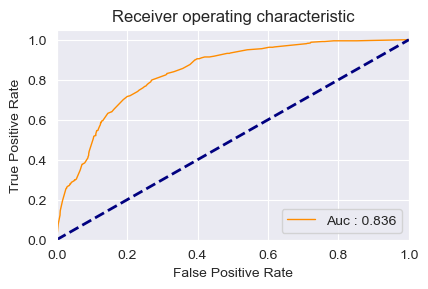

In [101]:
    tpot_classifier.fit(X_train,y_train)
    probabilities = tpot_classifier.predict_proba(X_test)[:,1]
    model_roc_auc = roc_auc_score(y_test,probabilities) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(y_test,probabilities)
    
    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

In [102]:
score = cross_val_score(estimator = tpot_classifier.fitted_pipeline_, X = X, y = y, cv = 4,  n_jobs = -1, \
                        scoring = "neg_mean_squared_error")

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

As we can see that the performance of the model on test data is same as training data. So, we can conclude that there is no overfitting and underfitting.

#### Saving model

In [103]:
tpot_classifier=tpot_classifier.fitted_pipeline_

In [104]:
#Saving best model 
import joblib
#Sava the model to disk
filename = 'modeldechg.sav'
joblib.dump(tpot_classifier, filename)

['modeldechg.sav']

In [98]:
import pickle
pickle.dump(model, open('model_dech.pkl','wb'))

In [70]:
import joblib
#Sava the model to disk
filename = 'modeldechm.sav'
joblib.dump(model, filename)

['modeldechm.sav']

In [117]:
tpot_classifier.export("tpot_classifier.py")

In [121]:
import pickle
pickle.dump(model, open('tclassifier.pkl','wb'))

## Explaining the model

In [2]:
!pip install pdp

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pdp: filename=pdp-0.3.0-py3-none-any.whl size=6623 sha256=ae8492d092e1a596ae7a222f5fb99f5be68a93eec7602cd25739aa4afaa0ef04
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\3d\8c\d0\5822a592b82c938cfa2396a418648b2118b3bfcd6bf1b6dc9b
Successfully built pdp


In [4]:
!pip install info_plots

ERROR: Could not find a version that satisfies the requirement info_plots (from versions: none)
ERROR: No matching distribution found for info_plots


In [15]:
pip install pip==21.3.1


     ---------------------------------------- 1.7/1.7 MB 3.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [18]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\Asus\anaconda3\python.exe -m pip install --upgrade pip' command.


In [19]:
!pip install pdpbox

  Using cached PDPbox-0.2.1-py3-none-any.whl
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'
  Rolling back uninstall of matplotlib
  Moving to c:\users\asus\anaconda3\lib\site-packages\__pycache__\pylab.cpython-39.pyc
   from C:\Users\Asus\AppData\Local\Temp\pip-uninstall-dzi3yd24\pylab.cpython-39.pyc
  Moving to c:\users\asus\anaconda3\lib\site-packages\matplotlib-3.5.2-py3.9-nspkg.pth
   from C:\Users\Asus\AppData\Local\Temp\pip-uninstall-b8s78asb\matplotlib-3.5.2-py3.9-nspkg.pth
  Moving to c:\users\asus\anaconda3\lib\site-pa

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Asus\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Asus\\AppData\\Local\\Temp\\pip-install-x7eulr1u\\matplotlib_40dc32a92e0e4c12bd019ab3b241cca2\\setup.py'"'"'; __file__='"'"'C:\\Users\\Asus\\AppData\\Local\\Temp\\pip-install-x7eulr1u\\matplotlib_40dc32a92e0e4c12bd019ab3b241cca2\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Asus\AppData\Local\Temp\pip-wheel-epuob_9a'
       cwd: C:\Users\Asus\AppData\Local\Temp\pip-install-x7eulr1u\matplotlib_40dc32a92e0e4c12bd019ab3b241cca2\
  Complete output (503 lines):
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.1.1]
        pyt

In [11]:
!pip install PDPbox

  Using cached PDPbox-0.2.1-py3-none-any.whl
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
  Running setup.py install for matplotlib: started
  Running setup.py install for matplotlib: finished with status 'error'
  Rolling back uninstall of matplotlib
  Moving to c:\users\asus\anaconda3\lib\site-packages\__pycache__\pylab.cpython-39.pyc
   from C:\Users\Asus\AppData\Local\Temp\pip-uninstall-tv3o839z\pylab.cpython-39.pyc
  Moving to c:\users\asus\anaconda3\lib\site-packages\matplotlib-3.5.2-py3.9-nspkg.pth
   from C:\Users\Asus\AppData\Local\Temp\pip-uninstall-g7_s9ke9\matplotlib-3.5.2-py3.9-nspkg.pth
  Moving to c:\users\asus\anaconda3\lib\site-packag

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [503 lines of output]
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.1.1]
        python: yes [3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit
                    (AMD64)]]
      platform: yes [win32]
  
  OPTIONAL SUBPACKAGES
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
  
  OPTIONAL BACKEND EXTENSIONS
           agg: yes [installing]
         tkagg: yes [installing; run-time loading from Python Tcl/Tk]
        macosx: no  [Mac OS-X only]
  
  OPTIONAL PACKAGE DATA
          dlls: no  [skipping due to configuration]
  
  C:\Users\Asus\anaconda3\lib\site-packages\setuptools\__init__.py:85: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated. Requirements should be satisfied by a PEP 517 installer. If you are using pip, you can try `pip install --use-pe

In [13]:
import eli5
from eli5.sklearn import PermutationImportance

from pdpbox import pdp, info_lists



In [14]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.1
aiosignal                     1.3.1
alabaster                     0.7.12
alembic                       1.9.1
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
arch                          5.3.1
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astor                         0.8.1
astroid                       2.11.7
astropy                       5.1
asttokens                     2.1.0
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
autograd                      1.5
autograd-gamma                0.5.0
Automat                       20.2.0
autopag

In [81]:
perm = PermutationImportance(model, random_state=1).fit(test_x, test_y)
eli5.show_weights(perm, feature_names = test_x.columns.tolist())

Weight,Feature
0.0185 ± 0.0058,InternetService_Fiber optic
0.0064 ± 0.0088,Contract_Two year
0.0045 ± 0.0058,OnlineSecurity
0.0041 ± 0.0134,Contract_One year
0.0038 ± 0.0086,PaymentMethod_Electronic check
0.0037 ± 0.0071,InternetService_No
0.0028 ± 0.0094,tenure
0.0026 ± 0.0011,OnlineBackup
0.0020 ± 0.0078,MonthlyCharges
0.0010 ± 0.0014,DeviceProtection


Visualizing how the partial dependance plots look for top features

#### Internet Service: Fiber Optic

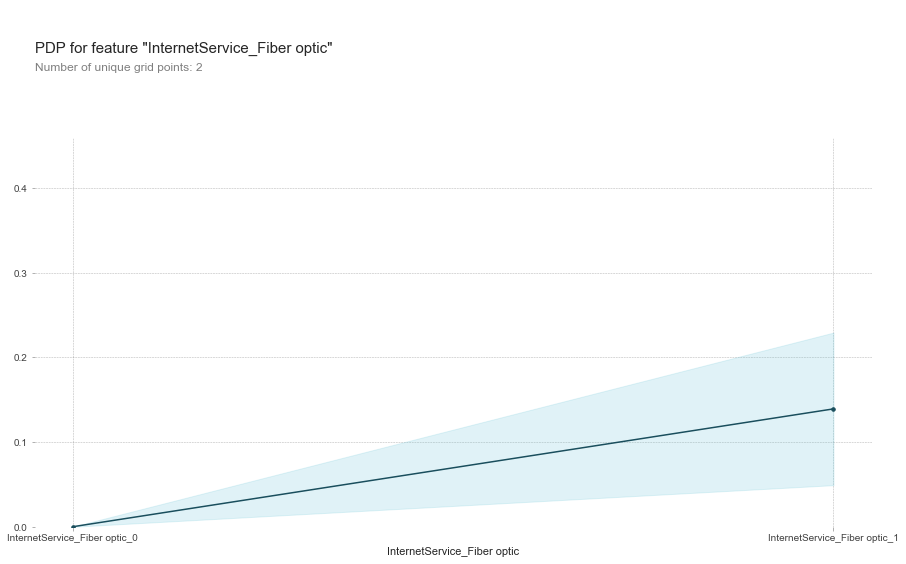

In [95]:
pdp_p = pdp.pdp_isolate(model=model, dataset=test_x, model_features=test_x.columns.values, 
                        feature='InternetService_Fiber optic')
pdp.pdp_plot(pdp_p, 'InternetService_Fiber optic')
plt.show()

#### Payment Method: Mailed Check

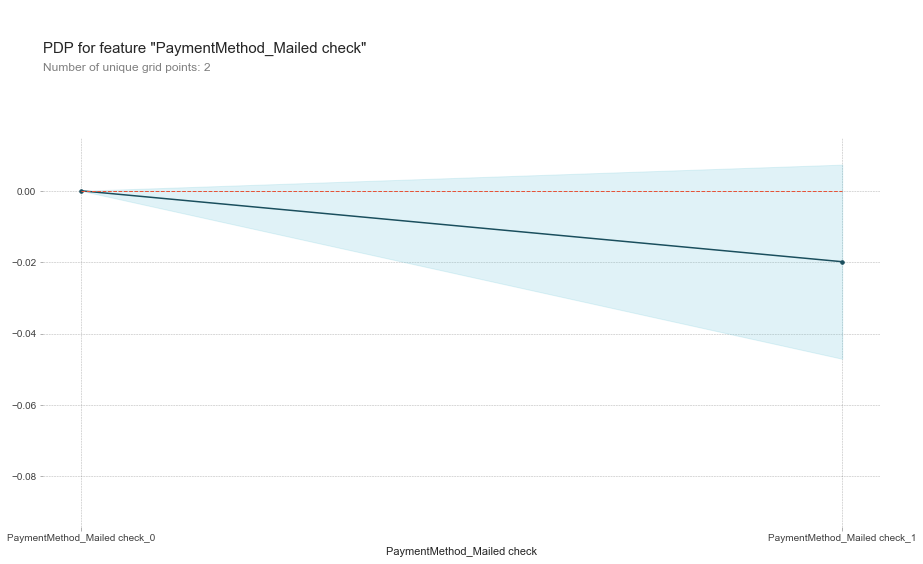

In [97]:
pdp_p = pdp.pdp_isolate(model=model, dataset=test_x, model_features=test_x.columns.values, 
                        feature='PaymentMethod_Mailed check')
pdp.pdp_plot(pdp_p, 'PaymentMethod_Mailed check')
plt.show()

#### Monthly Charges

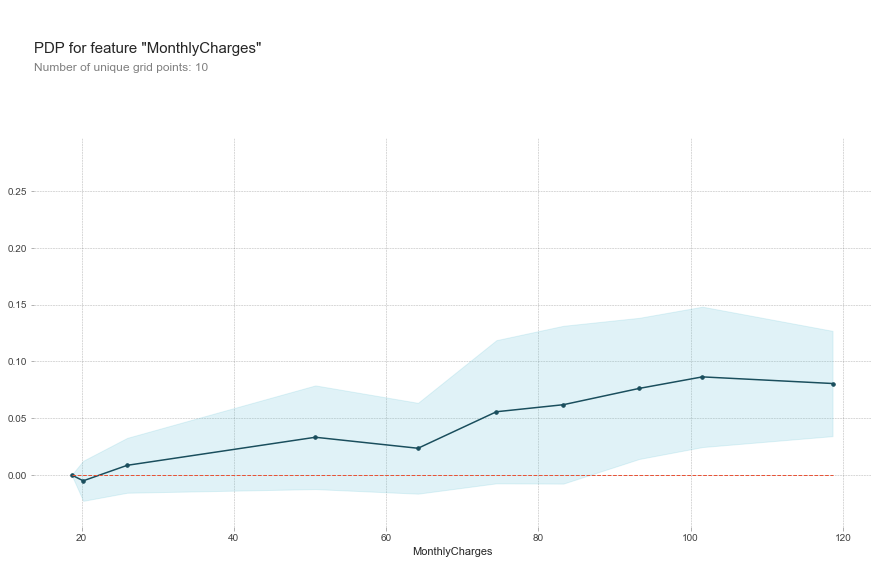

In [100]:
pdp_p = pdp.pdp_isolate(model=model, dataset=test_x, model_features=test_x.columns.values, feature='MonthlyCharges')
pdp.pdp_plot(pdp_p, 'MonthlyCharges')
plt.show()

#### Total Charges

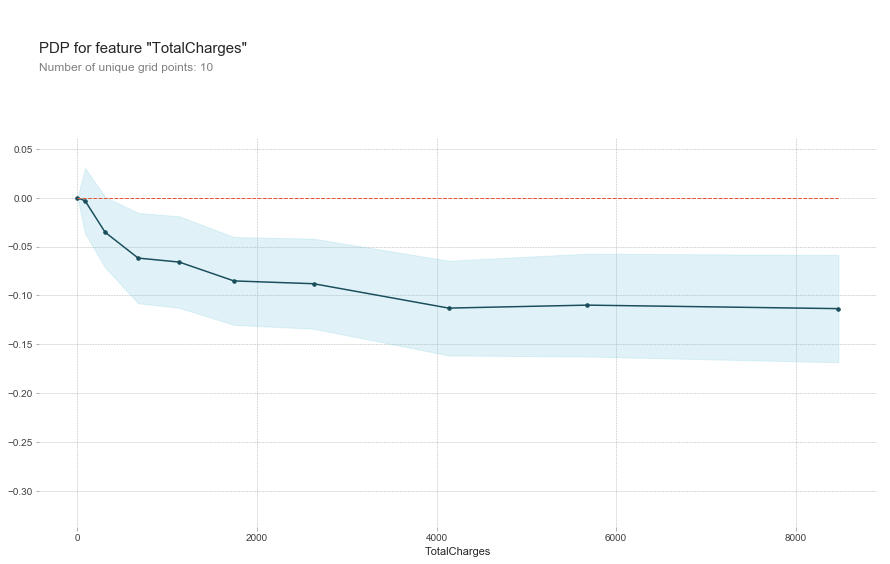

In [96]:
pdp_p = pdp.pdp_isolate(model=model, dataset=test_x, model_features=test_x.columns.values, feature='TotalCharges')
pdp.pdp_plot(pdp_p, 'TotalCharges')
plt.show()

#### Contract - Two years

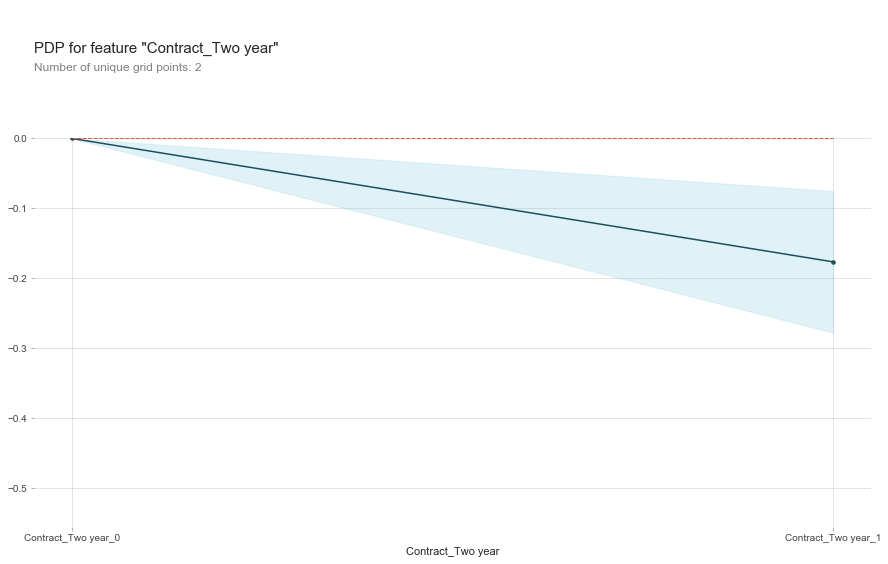

In [98]:
pdp_p = pdp.pdp_isolate(model=model, dataset=test_x, model_features=test_x.columns.values, 
                        feature='Contract_Two year')
pdp.pdp_plot(pdp_p, 'Contract_Two year')
plt.show()

#### Tenure

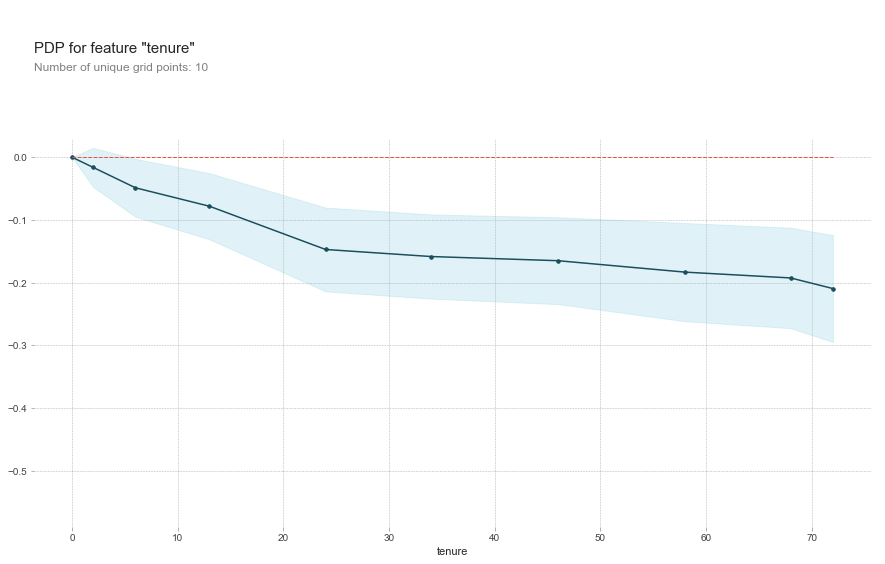

In [99]:
pdp_p = pdp.pdp_isolate(model=model, dataset=test_x, model_features=test_x.columns.values, 
                        feature='tenure')
pdp.pdp_plot(pdp_p, 'tenure')
plt.show()

### Shap Values

In [102]:
import shap 
shap.initjs()

import joblib

In [104]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(np.array(test_x.iloc[0]))
shap.force_plot(explainer.expected_value[1], shap_values[1], test_x.iloc[0])

In [105]:
# Saving Explainer
ex_filename = 'explainer.bz2'
joblib.dump(explainer, filename=ex_filename, compress=('bz2', 9))

['explainer.bz2']

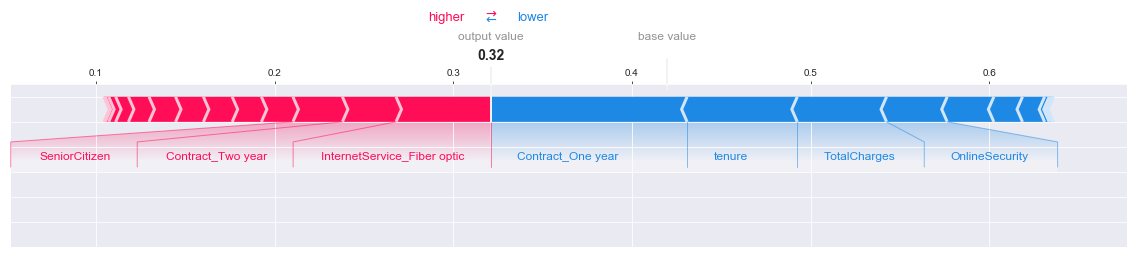

In [106]:
explainer = joblib.load(filename="explainer.bz2")
shap_values = explainer.shap_values(np.array(test_x.iloc[0]))
shap.force_plot(explainer.expected_value[1], shap_values[1], list(test_x.columns), matplotlib = True, show = False).savefig('static/images/shap.png', bbox_inches="tight")    

### Gauge Chart 

In [107]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

def gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
          colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], Probability=1, fname=False): 
    
    N = len(labels)
    colors = colors[::-1]

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(4)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, 'Churn Probability ' + np.round(Probability,2).astype(str), horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = (1-Probability)*180
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

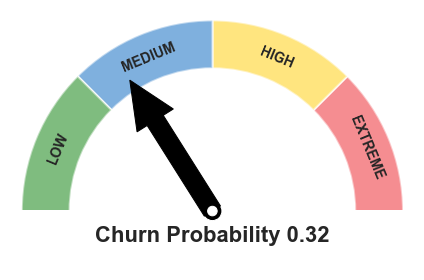

In [109]:
gauge(Probability=model.predict_proba(test_x.iloc[0:1])[0,1])

Final Features

In [103]:
test_x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')